# Millennium Data Cleaning Exercise

Data Scientists and Analysts are often tasked to clean and analyze datasets. We are working with an external research firm who specializes in the application of artificial intelligence to forecasting prices of financial instruments. This firm has developed a proprietary system, called “4sight”, to forecast prices of certain instruments.

To demonstrate the effectiveness of their forecasting system, the vendor has sent us attached sample dataset. The dataset includes signal values generated by the 4sight system as well as historical prices for a well-known broad market ETF.

A Portfolio Manager has asked you to:

-  Review the quality of the data, list any potential errors, and propose corrected values. Please list each quality check error and correction applied.

-  Please analyze the signal’s effectiveness or lack thereof in forecasting ETF price, using whatever metrics you think are most relevant.

-  (Extra credit) Write a 1-2 paragraph summary for the Portfolio Manager addressing your observations about the efficacy and believability of the product, and recommendation for next steps.


## Content of Analysis

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Overall Statistics</a>
3. <a href="#3">Data Format Cleaning</a>
4. <a href="#4">Data Validation</a>
5. <a href="#5">Prediction Validition</a>
6. <a href="#6">Conclusion</a>    
    * <a href="#61">Data Issue and Fix</a>
    * <a href="#62">Signal’s Effectiveness </a>
    * <a href="#63">Insights - Recommendations</a>

    




## 1. <a name="1">Read the dataset</a>

First read the dataset into a dataframe.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
source_data = pd.read_excel('Sample Dataset.xlsx')
print('The shape of the dataset is:', source_data.shape)

The shape of the dataset is: (1038, 7)


## 2. <a name="2">Overall Statistics</a>


Take look at number of rows, columns and some simple statistics of the dataset.

In [4]:
# Print the first five rows
# NaN means missing data
source_data.head(100)

,Date,Signal,Open,High,Low,Close,Adj Close
0,2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
95,2016-04-08,13.173104,109.610001,110.070000,108.629997,109.110001,102.546211
96,2016-04-11,12.271133,109.739998,110.550003,108.750000,108.769997,102.226677
97,2016-04-12,13.316347,108.790001,110.180000,108.430000,109.940002,103.326279
98,2016-04-13,12.139195,110.580002,112.430000,110.510002,112.309998,105.553719


In [5]:
# check any missing values and data type of each column
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1038 non-null   datetime64[ns]
 1   Signal     1038 non-null   float64       
 2   Open       1038 non-null   float64       
 3   High       1038 non-null   float64       
 4   Low        1038 non-null   float64       
 5   Close      1038 non-null   float64       
 6   Adj Close  1038 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 56.9 KB


We can conclude from above stats that there is no missing values in the dataset.

In [6]:
# This prints basic statistics for numerical columns
source_data.describe()

,Signal,Open,High,Low,Close,Adj Close
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,16.766190,141.847360,142.691801,140.907746,141.840973,136.341060
std,3.095783,18.475574,18.470255,18.404504,18.497010,21.427837
min,0.000000,94.080002,95.400002,93.639999,94.790001,-152.277847
25%,14.691150,132.132496,132.912495,130.542503,131.824993,125.290491
50%,17.298240,146.769997,147.959999,145.634995,146.885002,142.667732
75%,19.030890,155.367496,156.287495,154.422500,155.289993,151.798325
max,35.434147,172.789993,173.389999,171.949997,196.279999,168.842270


### Some interesting findings here: 
 - The minimum value for Adj Close is less then 0 which can be a data error, we need to fix it in next step
 - Signal is in a scale different with other attributes, we may need a feature scaling to make them comparable.
 - Minimum value of signal is 0, which we may take a look why they generate the 0 value in prediction.

## 3. <a name="3">Data Format Cleaning</a>


In [7]:
# convert Date to date type
source_data['Date']= pd.to_datetime(source_data['Date'])

In [8]:
source_data.head()

,Date,Signal,Open,High,Low,Close,Adj Close
0,2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159


## 4.  <a name="4">Data validation</a>
1. Check if any Low greater than High
2. Check the 0 value in Signal
3. Check if there is any outlier in each attributes

### Let's first plot each variable and see any abnormal trend

Text(0.5, 1.0, 'Adj Close')

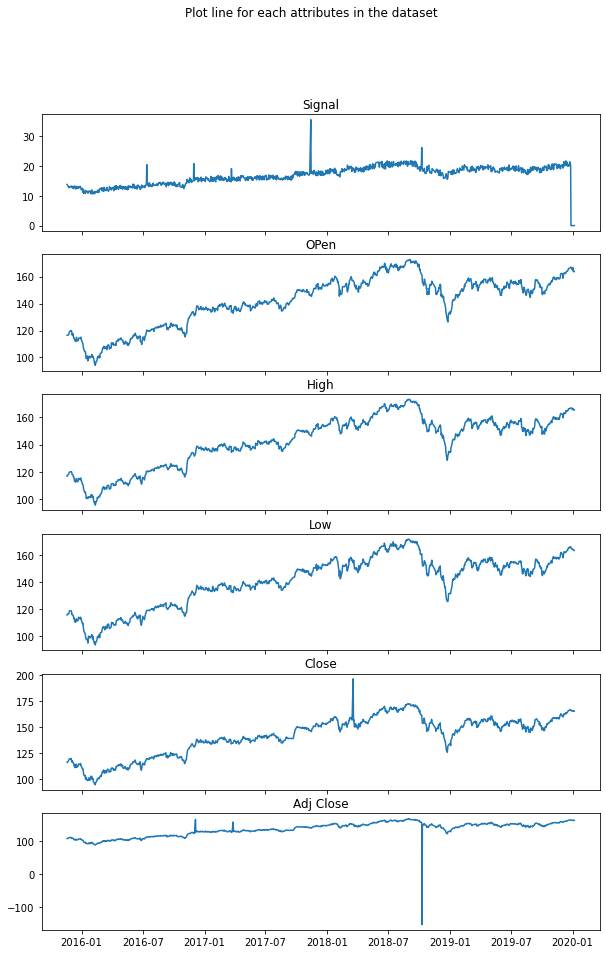

In [27]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6, sharex=True, sharey=False, figsize=(10,15))
fig.suptitle('Plot line for each attributes in the dataset')
axs[0].plot(source_data['Date'], source_data['Signal'])
axs[0].set_title('Signal')
axs[1].plot(source_data['Date'], source_data['Open'])
axs[1].set_title('OPen')
axs[2].plot(source_data['Date'], source_data['High'])
axs[2].set_title('High')
axs[3].plot(source_data['Date'], source_data['Low'])
axs[3].set_title('Low')
axs[4].plot(source_data['Date'], source_data['Close'])
axs[4].set_title('Close')
axs[5].plot(source_data['Date'], source_data['Adj Close'])
axs[5].set_title('Adj Close')

- __Open__ , __High__ and __Low__ are in a similar trend and not showing abnormal points in the figure.
- __Signal__ has several 0 value as we mentioned before, which shows at the end of time.
- __Adj Close__ has a value less than 0 which seems an error.
- __Close__ and __Siganl__ shows some extreme value in the figure.

### Let's first fix the less than 0 value in __Adj Close__:

In [28]:
# Adj Close has a value less than 0, replace it with the abs value
source_data['Adj Close'] = abs(source_data['Adj Close'])
min(source_data['Adj Close'])

88.820946

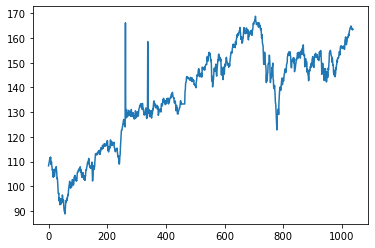

In [32]:
source_data['Adj Close'].plot.line()

### There are still two points that shows a abnormal value which is most likely bad data in the dataset. I will replace the value with its yesterday's __Adj Close__ value.

In [34]:
source_data.set_index('Date', inplace = True)
source_data.head()

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159


In [45]:
source_data.loc['2016-12-05']['Adj Close'] = source_data.loc['2016-12-02']['Adj Close']
source_data.loc['2017-03-27']['Adj Close'] = source_data.loc['2017-03-06']['Adj Close']

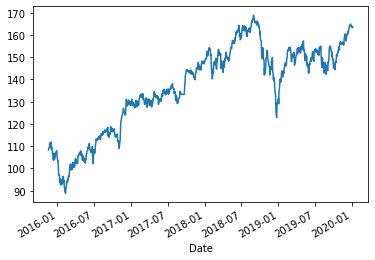

In [47]:
source_data['Adj Close'].plot.line()

Now the __Adj Close__ variable looks more reasonable and not showing wired trend.

### Then I will check those High is lower than Low situation

In [49]:
source_data[source_data['High'] < source_data['Low']]

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2018-03-07,18.885411,154.460007,156.929993,157.220001,156.740005,151.151840
2018-07-16,20.010313,167.759995,168.029999,169.960007,166.770004,161.779312


Only 2 records have the __High__ value lower than __Low__ value. It should not be the case and I will switch the value for them.

In [50]:
source_data.loc['2018-03-07']['High'], source_data.loc['2018-03-07']['Low'] = 
            source_data.loc['2018-03-07']['Low'], source_data.loc['2018-03-07']['High']

In [52]:
source_data.loc['2018-07-16']['High'], source_data.loc['2018-07-16']['Low'] = 
            source_data.loc['2018-07-16']['Low'], source_data.loc['2018-07-16']['High']

In [53]:
source_data[source_data['High'] < source_data['Low']]

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,


No record returned as we have switch the unusual value for __High__ and __Low__

### Then we check the unusual value in Close

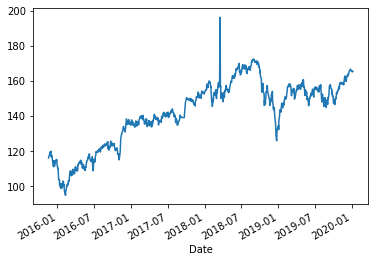

In [55]:
source_data['Close'].plot.line()

There is on Extreme value shows in the fighre which seems a bad data, I will replace it with its last trading day's  __Close__ value 

In [59]:
source_data.loc['2018-03-19']['Close'] = source_data.loc['2018-03-16']['Close']

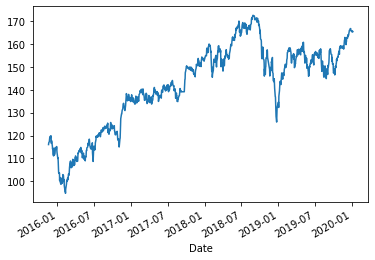

In [60]:
source_data['Close'].plot.line()

### Plot the data to see if there are any potential errors in the dataset.

Text(0.5, 1.0, 'Adj Close')

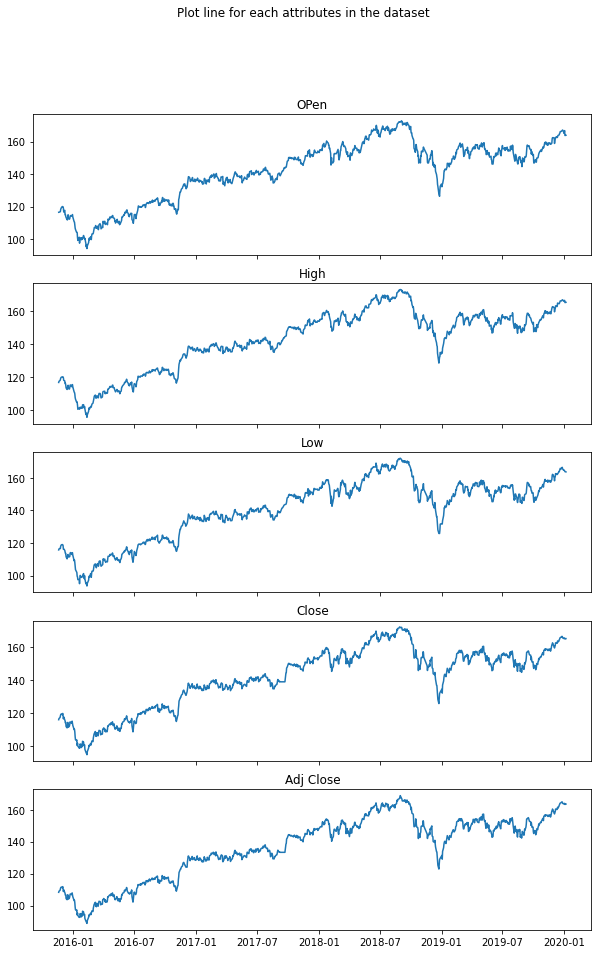

In [61]:
fig, axs = plt.subplots(5, sharex=True, sharey=False, figsize=(10,15))
fig.suptitle('Plot line for each attributes in the dataset')
axs[0].plot(source_data['Open'])
axs[0].set_title('OPen')
axs[1].plot(source_data['High'])
axs[1].set_title('High')
axs[2].plot(source_data['Low'])
axs[2].set_title('Low')
axs[3].plot(source_data['Close'])
axs[3].set_title('Close')
axs[4].plot(source_data['Adj Close'])
axs[4].set_title('Adj Close')

Now all the plot shows a similar trend and there is no abnormal values in the figure. Because __Signal__ is the generated value which is used to predict ETF price, I won't do any correction for this variable. 

## 5.  <a name="5">Prediction Validation</a>

To check the efficacy and believability of the product, I will use the __Signal__ value to compare with another metric in the dataset. One good candidate will be the correlation value. Let's first calculate the correlation of __Signal__ with other variables.


In [66]:
correlation_matrix = source_data.corr()
correlation_matrix

,Signal,Open,High,Low,Close,Adj Close
Signal,1.000000,0.802246,0.804064,0.802049,0.803744,0.805106
Open,0.802246,1.000000,0.999213,0.998807,0.997621,0.995801
High,0.804064,0.999213,1.000000,0.998783,0.998781,0.997216
Low,0.802049,0.998807,0.998783,1.000000,0.998864,0.996530
Close,0.803744,0.997621,0.998781,0.998864,1.000000,0.998029
Adj Close,0.805106,0.995801,0.997216,0.996530,0.998029,1.000000


#### Plot a heatmap for the correlation of SIgnal with other variables

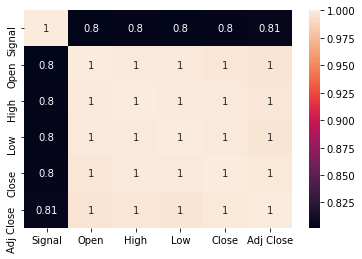

In [68]:
import seaborn as sn
sn.heatmap(correlation_matrix, annot=True)
plt.show()

From the correlation matrix we can see that __Signal__ has a significant positive relationship with our other variables. For example the correlation between __Signal__ and __Adj Close__ is 0.805 which is quit close to 1, it seems a very good indicator for the prediction of __Adj Close__.
<br>
Let's visulize them to see the relationship between the __Signal__ and __Adj Close__.


In [69]:
source_data.describe()

,Signal,Open,High,Low,Close,Adj Close
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,16.766190,141.847360,142.693940,140.905607,141.803902,136.567332
std,3.095783,18.475574,18.473122,18.401418,18.426224,19.438496
min,0.000000,94.080002,95.400002,93.639999,94.790001,88.820946
25%,14.691150,132.132496,132.912495,130.542503,131.824993,125.290491
50%,17.298240,146.769997,147.959999,145.634995,146.885002,142.652329
75%,19.030890,155.367496,156.287495,154.422500,155.289993,151.786698
max,35.434147,172.789993,173.389999,171.949997,172.500000,168.842270


However we can see that the scale of __Signal__ and __Adj Close__ is quit different, so a feature scaling might be necessary before plot them. In the execise here, I'm using normalization for both the variables.

In [77]:
normalized_df=(source_data-source_data.min())/(source_data.max()-source_data.min())
normalized_df.head()

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2015-11-19,0.388567,0.284081,0.272471,0.282212,0.273710,0.243193
2015-11-20,0.384059,0.284589,0.281575,0.290384,0.283361,0.251938
2015-11-23,0.366612,0.287511,0.288370,0.294215,0.290825,0.258700
2015-11-24,0.357492,0.289671,0.295166,0.292683,0.301892,0.268727
2015-11-25,0.367440,0.307712,0.306706,0.312476,0.313731,0.279453


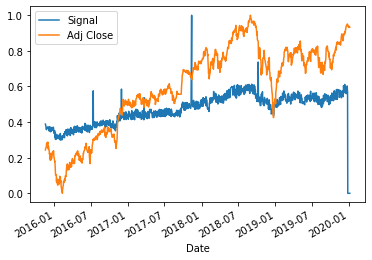

In [79]:
normalized_df.plot.line(y=['Signal', 'Adj Close'])

### Still there are few points in __Signal__ that show as 0, which I will take another look at them.

In [80]:
source_data[source_data['Signal'] == 0]

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2019-12-27,0.0,167.119995,167.119995,165.429993,165.860001,164.039063
2019-12-30,0.0,165.979996,166.210007,164.570007,165.440002,163.623688
2019-12-31,0.0,165.080002,166.350006,164.710007,165.669998,163.851135
2020-01-02,0.0,166.740005,166.750000,164.229996,165.779999,163.959946
2020-01-03,0.0,163.740005,165.410004,163.699997,165.130005,163.317093
2020-01-06,0.0,163.850006,165.539993,163.539993,165.350006,163.534668


It is the last six days in the dataset, my assumption is they are predicting the next 6 days' moving average that's why there are six days __Signal__ value is 0.

### Signal compare with 6 days' moving average

Created a new dataset without last 6 days data and a new column which is the next 6 days __Adj Close__ moving average value.

In [85]:
updated_data = pd.read_excel('Sample Dataset copy.xlsx')

In [88]:
updated_data.set_index('Date', inplace = True)
updated_data.head()

,Signal,Open,High,Low,Close,Adj Close,Adj Move Avg
Date,,,,,,,
2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601,110.455437
2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323,110.934366
2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453,111.122518
2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837,110.865946
2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159,110.649807


In [92]:
normalized_updated_df=(updated_data-updated_data.min())/(updated_data.max()-updated_data.min())

In [90]:
correlation_matrix_moving_avg = normalized_updated_df.corr()
correlation_matrix_moving_avg

,Signal,Open,High,Low,Close,Adj Close,Adj Move Avg
Signal,1.000000,0.929529,0.931475,0.929225,0.929353,0.835022,0.920845
Open,0.929529,1.000000,0.999214,0.998786,0.995434,0.886586,0.963616
High,0.931475,0.999214,1.000000,0.998749,0.996510,0.888540,0.965231
Low,0.929225,0.998786,0.998749,1.000000,0.996468,0.889940,0.964912
Close,0.929353,0.995434,0.996510,0.996468,1.000000,0.889909,0.963555
Adj Close,0.835022,0.886586,0.888540,0.889940,0.889909,1.000000,0.866504
Adj Move Avg,0.920845,0.963616,0.965231,0.964912,0.963555,0.866504,1.000000


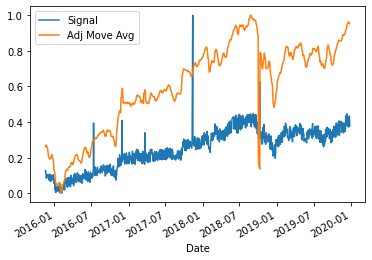

In [91]:
normalized_updated_df.plot.line(y=['Signal', 'Adj Move Avg'])

### There is a significant market drop sometime in 2018, let's zoom in data between 2018-09 and 2018-11

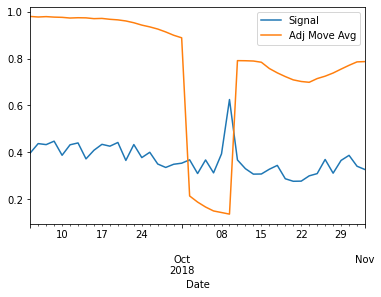

In [95]:
normalized_updated_df.loc['2018-09-01':'2018-11-01'].plot.line(y=['Signal', 'Adj Move Avg'])

__Signal__ has a good prediction when the market goes up , however, there is no signal to show before the market goes down.

## 6.  <a name="6">Conclusions</a>

Purpose of this exercise is cleaning any potential data errors and validate the efficacy of the __Siganl__ provided from other company. 

### <a name="61">Data Issue and Fix<a>


1. Negative market price for __Adj Close__
   <br> From the plot in previus section, there is a negative value in __Adj Close__ which is definitely a bad data. Fix here is to use the absolute value to replace the negative value.
2. __High__ value is less than __Low__
   <br> There are few records in the dataset where __High__ value is less than __Low__ value. It dosen't make sense so the fix method is to switch the value for them.
3. Outlier in the dataset
   <br> From the plot before, there is a potential outlier in __Close__ where the value is most likely a outlier. As well as in __Adj Close__. So I used their last trading day's value to replace the outlier value in the dataset.

### <a name="62">Signal’s Effectiveness </a>

From the corrlation matrix in our previous section, the corelation between __Signal__ and other variables for example the __Adj Close__, the correlation is about 0.8. And it is close to 0.92 when we remove records when __Signal__ is 0 and compare it against the future 6 days' moving average.
<br> From the statistic perspective, the signal has a strong positive relationship with the ETF price and is good candidate for the prediction of ETF price.

### <a name="63">Insights - Recommendations </a>

Though from the statistic perspective the __Signal__ has a very strong correlation with the ETF price like __Adj Close__ or 6 days' moving average. I still think the signal is not as good as it shows. 

1. The unit of __Signal__ is blurry<br>
Signal here is a numeric indicator from 0 to 35 which doesn't show a good sign of sell or buy. I would prefer a number that range from -1 to 1 which will give the user a clear direction to sell or buy.
2. Not perform well for some benchmark point<br>
For example there was a significant drop for the ETF in 2018-10, but the siganl doesn't show any trend for the drop though it has a value up before the price goes up. 
3. False Positive Prediction<br>
There are several peaks in the __Signal__, however, from the trend of ETF it doesn't correctly predict a increase or decrease. 


#### Future Step
Overall the __Signal__ seems have a good prediction and shows a highly correlation with the ETF price. I would still suggest: first to optimize it to provide a value between -1 to 1 or a normalized value which gives a clear sign to sell or buy.
Second I will use it as a reference rather than a decision maker, since it missed a few of the market drops during its prediction period.<br>
Lastly, the ETF here looks like the SP500 trend, and we can always predict the price goes up during this time period which is line up with the actual market. So the important factor becomes if we can capture the drop or at least some major drops in the market before we invest more in the market.<br>

